# SimpleITK
# Premières utilisations 

Dans cette partie, nous allons continuer à explorer les fonctions basiques de *SimpleITK* et découvrir 2 autres modules intéressants dans l'univers Python : [*numpy*](http://www.numpy.org) et *[matplotlib](http://matplotlib.org)*. L'utilisation conjointe de numpy et matplotlib permet à Python d'être équivalent de [*matlab*](http://fr.mathworks.com/products/matlab/) sous bien des égards.


In [6]:
%matplotlib inline
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

Le code précédent importe dans l'espace de nommage les modules nécessaires à savoir *SimpleITK*, *numpy* pour réaliser quelques traitements simples sur les vecteurs et matrices et *matplotlib* pour gérer l'affichage de graphiques dans le notebook. 


Les commandes commençant par un signe $\%$ sont appelées des fonctions magiques dans le terminal *Ipython*. Nous vous laissons découvrir plus en détail ce que permettent ces [fonctions](http://ipython.readthedocs.org/en/stable/interactive/magics.html?highlight=magic).
Dans le cas présent, la fonction 
> `%matplotlib inline`

permet d'afficher les graphiques rendus par le module *matplotlib* au sein même du notebook.


# Obtenir des statistiques basiques sur une image

In [8]:
img = sitk.ReadImage('./02_2_SimpleITKFiltres/boats.tif')
stats = sitk.StatisticsImageFilter()
stats.Execute(img)
print stats

itk::simple::StatisticsImageFilter
  Minimum: 3
  Maximum: 220
  Mean: 120.027
  Sigma: 49.1876
  Variance: 2419.42
  Sum: 4.97775e+07
  Debug: 0
  NumberOfThreads: 4
  Commands: (none)
  ProgressMeasurement: 1
  ActiveProcess: (none)



Il est possible d'afficher une image au sein du notebook grâce à la commande `imshow` du module pyplot de matplotlib.

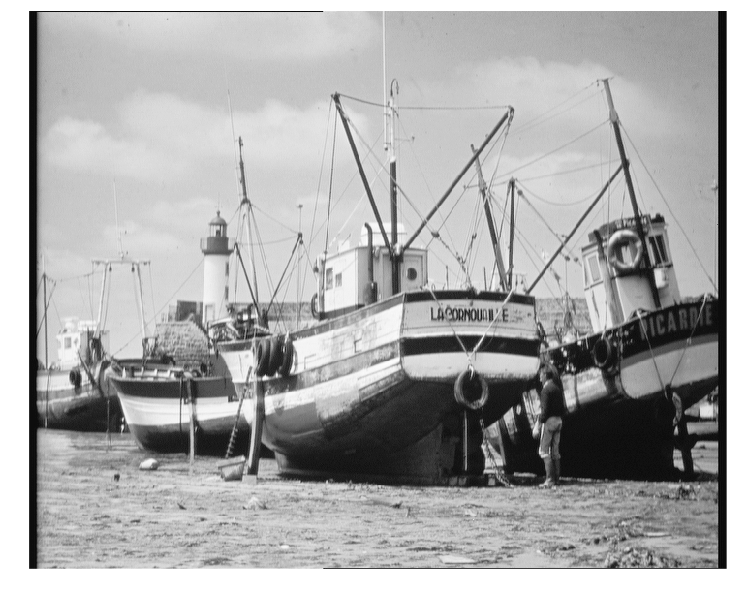

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(sitk.GetArrayFromImage(img),
           cmap=plt.cm.Greys_r,interpolation='none');
plt.axis('off');
plt.show()

____
## Obtenir un histogramme

Pour obtenir l'histogramme des valeurs contenues dans l'image de travail, il faut récupérer le vecteur associé à cette image pour que *numpy* puisse travailler avec grâce à la fonction `sitk.GetArrayFromImage`. Voici la page d'aide associée à cette commande.

In [197]:
help(sitk.GetArrayFromImage)

Help on function GetArrayFromImage in module SimpleITK.SimpleITK:

GetArrayFromImage(image)
    Get a numpy array from a SimpleITK Image.



Le code suivant permet d'afficher l'histogramme des valeurs et l'histogramme des valeurs cumulées. 

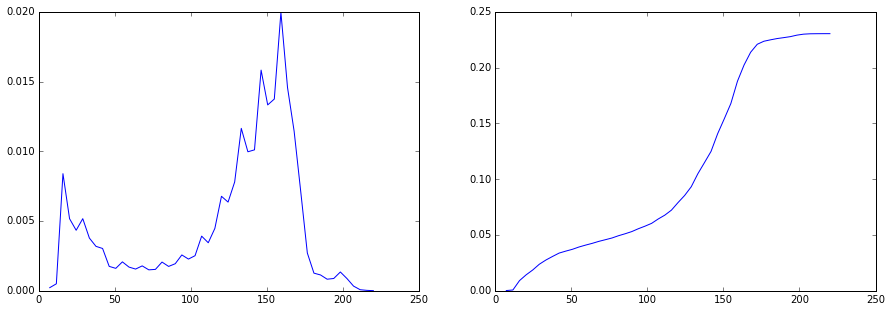

In [10]:
histo = np.histogram(sitk.GetArrayFromImage(img),bins = 50,normed=True)
histoCum = np.cumsum(histo[0])
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plot = plt.plot(histo[1][1:],histo[0])
plt.subplot(1,2,2)
plot = plt.plot(histo[1][1:],histoCum)

On observe une proportion importante des valeurs autour des valeurs proches de 10 et 160. L'histogramme des valeurs cumulées reflète cette distribution. 

Pour illustrer le fonctionnement des filtres au sein de *SimpleITK*, nous allons appliquer un filtre égalisateur dont le rôle sera de rendre linéaire la distribution cumulée des valeurs.

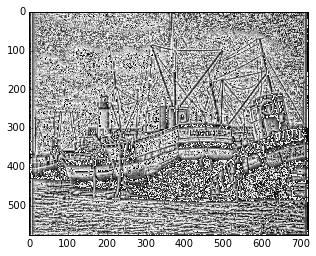

In [11]:
# Appel du filtre d'égalisation
histEqual = sitk.AdaptiveHistogramEqualization(
    img, alpha = 0., beta = 1)
# On recupère le tableau au format numpy
np_histEqual = sitk.GetArrayFromImage(histEqual)
# On génère l'histogramme
histo2 = np.histogram(np_histEqual,bins = 50,normed=True)
# On génère l'histogramme cumulé
histoCum2 = np.cumsum(histo2[0])
# AFFICHAGE de l'image égalisée
plt.imshow(np_histEqual, cmap=plt.cm.Greys_r,interpolation='none')
plt.show()

Observons l'effet de ce filtre sur les histogrammes des images grâce au code suivant :

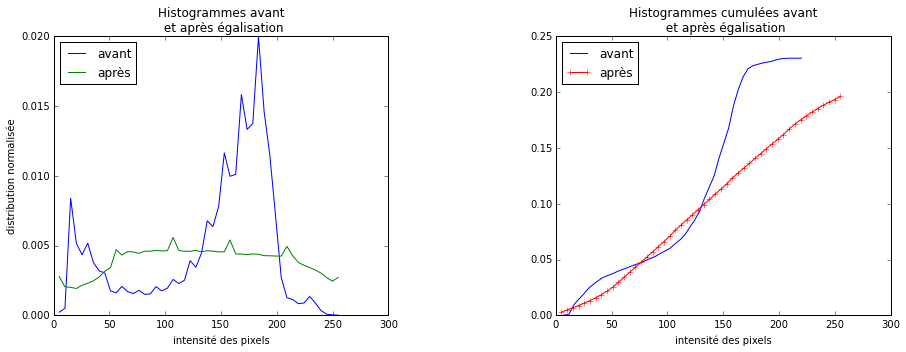

In [200]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(u'Histogrammes avant \n et après égalisation');
plt.plot(histo2[1][1:],histo[0],histo2[1][1:],histo2[0]);
#plt.ylabel(u'distribution normalisée');
plt.xlabel(u'intensité des pixels');
plt.ylabel(u'distribution normalisée');
plt.legend((u'avant',u'après'),loc = 2)
plt.subplot(1,2,2)
plt.title(u'Histogrammes cumulées avant \n et après égalisation');
plt.plot(histo[1][1:],histoCum, histo2[1][1:],histoCum2,'r-+');
plt.xlabel(u'intensité des pixels');
plt.legend((u'avant',u'après'),loc=2)
plt.subplots_adjust(wspace = 0.5)
plt.show()

____
## Exercice 1
1. Créez une image 64x64 de 8 bit uniformément remplie de valeurs aléatoires entre [0; 255] en utilisant la fonction *numpy* `random_integers` du sous-module `random` de *numpy*. Analysez l'histogramme des valeurs pour évaluer l'homogénéité de la distribution des valeurs.
2. Puis créez une image à partir d'un vecteur issu de *numpy* en utilisant la fonction `sitk.GetImageFromArray` et affichez la.
3. Uilisez une autre fonction aléatoire dont la distribution n'est plus homogène et regardez l'effet sur l'histogramme.

___
**Correction**:

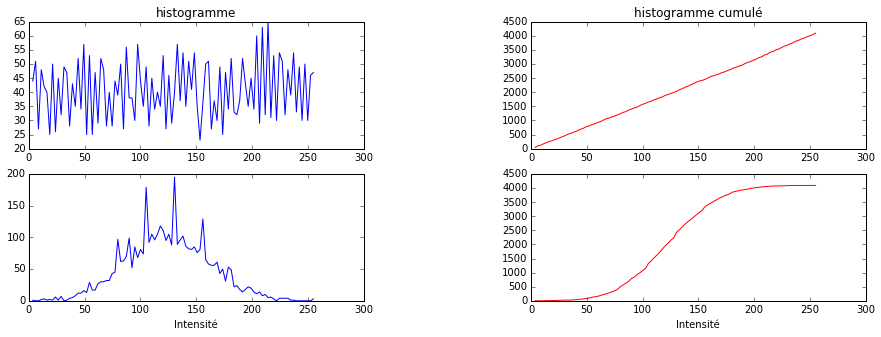

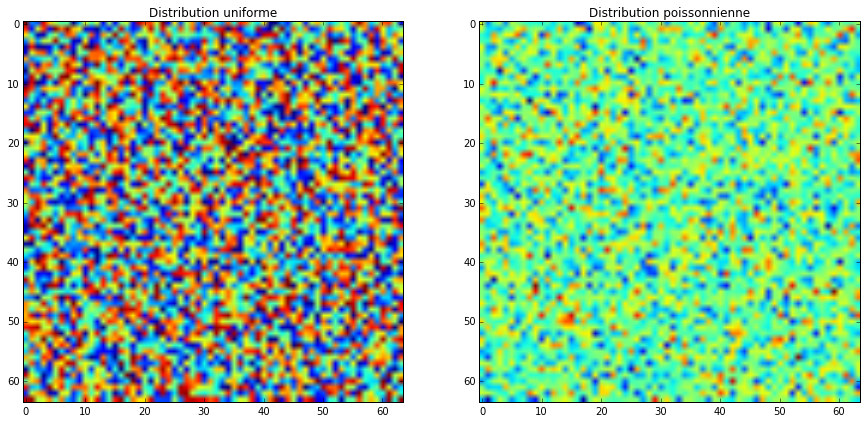

In [201]:
from numpy.random import random_integers, poisson

# la création du vecteur
array = np.empty((64*64,1),dtype=np.int16)
arr_fish = np.empty((64*64,1),dtype=np.int16)

for k in range(array.size):
    array[k] = random_integers(255)
    arr_fish[k] = poisson(255)
#   les histogrammes
histo_random = np.histogram(array,bins=100)
histo_random_cum = np.cumsum(histo_random[0])

histo_random_fish = np.histogram(arr_fish,bins=100)
histo_random_cum_fish = np.cumsum(histo_random_fish[0])

# les plots
plt.subplots(2,2,figsize=(15,5))
plt.subplot(2,2,1)
plt.plot(histo_random[1][1:],histo_random[0])
plt.title(u'histogramme')
plt.subplot(2,2,2)
plt.title(u'histogramme cumulé')
plt.plot(histo_random[1][1:],histo_random_cum,'r')
plt.subplot(2,2,3)
plt.plot(histo_random[1][1:],histo_random_fish[0])
plt.xlabel(u'Intensité')
plt.subplot(2,2,4)
plt.plot(histo_random[1][1:],histo_random_cum_fish,'r')
plt.xlabel(u'Intensité')
plt.subplots_adjust(wspace = 0.5)
# vers SimpleITK
arr_norm = np.reshape(array,((64,64)))
arr_fish = np.reshape(arr_fish,((64,64)))
imageNorm = sitk.GetImageFromArray(arr_norm, sitk.sitkUInt8)
imageFish = sitk.GetImageFromArray(arr_fish, sitk.sitkUInt8)
plt.subplots(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Distribution uniforme')
plt.imshow(sitk.GetArrayFromImage(imageNorm))
plt.subplot(1,2,2)
plt.title('Distribution poissonnienne')
plt.imshow(sitk.GetArrayFromImage(imageFish))
plt.show()
#sitk.Show(image)


____
## Operations sur les pixels
### Correspondance d'histogramme
Dans l'exemple précédent, nous avons égalisé une image en linéarisant la distribution cumulée de ses niveaux de gris. En fait, ce n'est guère utile. Il est souvent plus intéressant d'ajuster la distribution cumulée des niveaux de gris d'une image sur celle d'une autre image pour permettre une meilleure comparaison visuelle des niveaux de gris entre 2 images.

Pour réaliser cela, nous utiliserons la fonction de *SimpleITK* : `HistogramMatchingImageFilter`. L'aide en ligne nous montre que ce filtre nécessite plusieurs paramètres pour sa mise en oeuvre.

In [202]:
help(sitk.HistogramMatching)

Help on function HistogramMatching in module SimpleITK.SimpleITK:

HistogramMatching(image1, image2, numberOfHistogramLevels=256, numberOfMatchPoints=1, thresholdAtMeanIntensity=True)
    HistogramMatching(Image image1, Image image2, uint32_t numberOfHistogramLevels=256, uint32_t numberOfMatchPoints=1, bool thresholdAtMeanIntensity=True) -> Image
    
    Normalize the grayscale values between two images by histogram
    matching.
    
    
    This function directly calls the execute method of HistogramMatchingImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::HistogramMatchingImageFilter for the object oriented interface



Le code suivant permet d'ouvrir 2 images scintigraphiques CE antéro-postérieures d'un patient réalisées à des jours différents et d'en afficher les histogrammes des valeurs de gris ainsi que leur distribution cumulée.

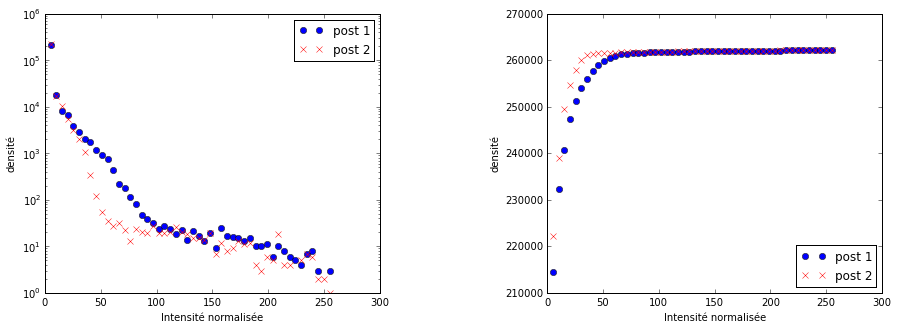

In [6]:
ce_1 = sitk.ReadImage('./CE_1.tif')
ce_2 = sitk.ReadImage('./CE_2.tif')

# on ne prend que les vues postérieures dans notre cas 
post_1 = ce_1[:,:,1]
post_2 = ce_2[:,:,1]

rescale_post1 = sitk.RescaleIntensity(post_1)
rescale_post2 = sitk.RescaleIntensity(post_2)
# on regarde les histogrammes
histo_post1 = np.histogram(sitk.GetArrayFromImage(rescale_post1),50)
histo_post1_cum = np.cumsum(histo_post1[0])
histo_post2 = np.histogram(sitk.GetArrayFromImage(rescale_post2),50)
histo_post2_cum = np.cumsum(histo_post2[0])

# On  affiche les histogrammes et les densités cumulées
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(histo_post1[1][1:],histo_post1[0],'bo');
plt.plot(histo_post2[1][1:],histo_post2[0],'rx');
plt.xlabel(u'Intensité normalisée')
plt.ylabel(u'densité')
plt.legend(('post 1', 'post 2'))
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(histo_post1[1][1:],histo_post1_cum,'bo');
plt.plot(histo_post2[1][1:],histo_post2_cum,'rx');
plt.xlabel(u'Intensité normalisée')
plt.ylabel(u'densité')
plt.legend(('post 1', 'post 2'),loc=4)
plt.subplots_adjust(wspace = 0.5)

plt.show()

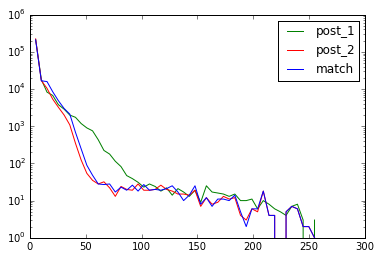

In [7]:
image_match = sitk.HistogramMatching(rescale_post2,rescale_post1)
histo_match = np.histogram(sitk.GetArrayFromImage(image_match),50)
histo_match_cum = np.cumsum(histo_match[0])

plt.plot(histo_post1[1][1:],histo_post1[0],'g');
plt.plot(histo_post2[1][1:],histo_post2[0],'r');
plt.plot(histo_match[1][1:],histo_match[0],'b');
plt.yscale('log');
#plt.xscale('log');
plt.legend(('post_1','post_2','match'));
sitk.Show(rescale_post1,'post1')
sitk.Show(rescale_post2,'post2')
sitk.Show(image_match,'match')
plt.show()

Il semble que l'algorithme ne fonctionne pas très bien, car l'histogramme de l'image créée par l'algorithme `HistogramMatching` est finalement très peu différent de celui de l'image *post_2*.
____

##  Exercice 2
1. Avez-vous une idée pour laquelle l'algorithme semble pris en défaut ?
2. Que proposeriez-vous pour remedier au problème ?

____
**Correction**:

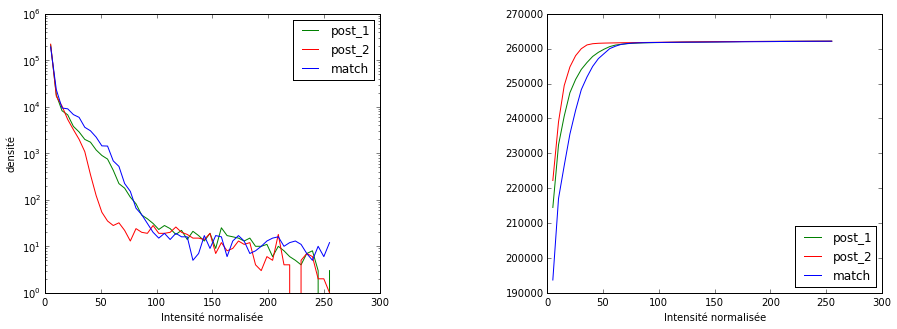

In [8]:
# Seuillage 
post_1_Th = (rescale_post1 > 10 | rescale_post1 < 150)
post_2_Th = (rescale_post2 > 10 | rescale_post2 < 150)
post_1_Th = sitk.RescaleIntensity(post_1*sitk.Cast(post_1_Th,sitk.sitkUInt16))
post_2_Th = sitk.RescaleIntensity(post_2*sitk.Cast(post_2_Th,sitk.sitkUInt16))

# Histogram matching
image_match_Th = sitk.HistogramMatching(post_2_Th, post_1_Th)

histo_match_Th = np.histogram(sitk.GetArrayFromImage(image_match_Th),50)
histo_match_Th_Cum = np.cumsum(histo_match_Th[0])

sitk.Show(post_1_Th, 'post1')
sitk.Show(post_2_Th,'post2')
sitk.Show(image_match_Th,'match')

# Affichage des histogrammes 
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(histo_post1[1][1:],histo_post1[0],'g');
plt.plot(histo_post2[1][1:],histo_post2[0],'r');
plt.plot(histo_match_Th[1][1:],histo_match_Th[0],'b');
plt.ylabel(u'densité')
plt.xlabel(u'Intensité normalisée')
plt.yscale('log');
#plt.xscale('log');
plt.legend(('post_1','post_2','match'));
plt.subplot(1,2,2)
plt.plot(histo_post1[1][1:],histo_post1_cum,'g');
plt.plot(histo_post2[1][1:],histo_post2_cum,'r');
plt.plot(histo_post2[1][1:],histo_match_Th_Cum,'b');
plt.xlabel(u'Intensité normalisée')
plt.legend(('post_1','post_2','match'),loc=4);
plt.subplots_adjust(wspace = 0.5)
plt.show()

____
## Filtres linéaires
Les opérations mathématiques réalisées à la section précédente étaient réalisées sur chaque pixel pris individuellement. Les filtres quant à eux combinent les informations prises sur plusieurs pixels simultanément pour appliquer une fonction mathématique sur un pixel de l'image. Si les opérations mathématiques combinent les informations linéairement, on parle de *filtre linéaire*. 

### Le produit de convolution
La manière la plus classique de représenter les opérations de filtrage linéaire est de présenter un produit de convolution entre l'image à traiter $I$ et un noyau de convolution $H$.
$$ I^\prime(u,v) = \sum_{(i,j)\in R_H}I(u+i,v+j)\cdot H(i,j)$$
où  $ R_H$ correspond au domaine d'action des pixels du noyau et (u,v) sont les pixels de l'image $I$.

### Lissage
Le produit de convolution permet par exemple de lisser les images sur lesquelles le filtre est appliqué lorsque le noyau de convolution contient des valeurs positives.

#### Algorithme :
La cellule suivante présente un algorithme très simple (pas de prise en compte des bords de l'image) qui permet de réaliser une convolution d'une image *SimpleITK* par un noyau 3x3 pixels dont les valeurs valent 1.

In [3]:
def MaConvolution_kern1(monimage):
    ker_1 = np.ones((3,3),dtype=np.int16)
    arr_boat = sitk.GetArrayFromImage(monimage)
    out_arr = np.array(arr_boat,dtype=np.int16)
    for u in range(1,arr_boat.shape[0]-1):
        for v in range(1,arr_boat.shape[1]-1):
            somme = 0
            for i in range(-1,2):
                for j in range(-1,2):
                    somme = somme + arr_boat[u+i,v+j]
            out_arr[u,v] = somme
    return out_arr

CPU times: user 4.27 s, sys: 97.6 ms, total: 4.37 s
Wall time: 4.44 s


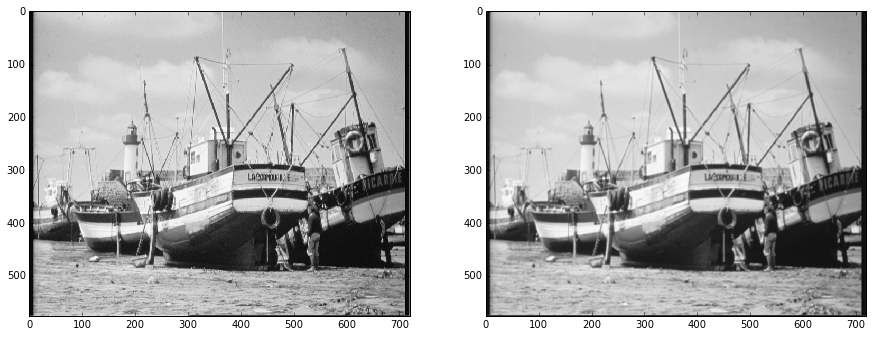

In [4]:
%time smooth_img = MaConvolution_kern1(img)
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img), cmap=plt.cm.Greys_r,interpolation='none');
plt.subplot(1,2,2)
plt.imshow(smooth_img, cmap=plt.cm.Greys_r,interpolation='none');

#### Exercice 3 : 
1. Remplacez dans la fonction `MaConvolution_kern1` le type `np.int16` par `np.int8` aux lignes 2 et 4 et relancer la cellule précedente.
2. Que s'est-il passé ? Quel remède doit-on opérer pour remedier à ce problème ?

**Correction**:

In [208]:
def MaConvolution_kern2(monimage):
    ker_1 = np.ones((3,3),dtype=np.int8)
    ker_som = ker_1.sum()
    arr_boat = sitk.GetArrayFromImage(monimage)
    out_arr = np.array(arr_boat,dtype=np.int8)
    for u in range(1,arr_boat.shape[0]-1):
        for v in range(1,arr_boat.shape[1]-1):
            somme = 0
            for i in range(-1,2):
                for j in range(-1,2):
                    somme = somme + arr_boat[u+i,v+j]
            out_arr[u,v] = somme//ker_som
    return out_arr

La même opération est bien sûr réalisable avec *SimpleITK*

CPU times: user 34.3 ms, sys: 345 µs, total: 34.6 ms
Wall time: 9.21 ms


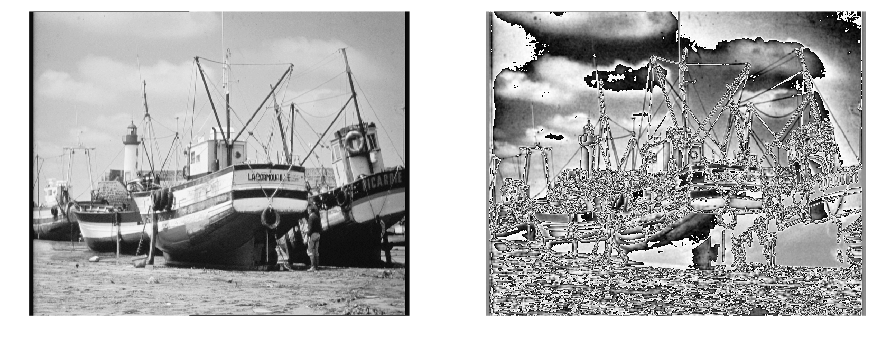

In [9]:
taille_filtre = 3
kern = sitk.Image(taille_filtre,taille_filtre,sitk.sitkUInt8)
for u in range(0,taille_filtre):
    for v in range(0,taille_filtre):
        kern[u,v] = 1
%time imgConv = sitk.Convolution(img,kern)
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img),
           cmap=plt.cm.Greys_r,interpolation='none');
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(imgConv),
           cmap=plt.cm.Greys_r,interpolation='none');
plt.axis('off')
plt.show()

#### Exercice 4 :
Que s'est-il passé ? Quelle option de la fonction `sitk.Convolution` doit-on valider pour corriger ce problème ?

**Correction**:
```python
Image_conv = sitk.Convolution(Image1,kern,normalize=True)
```

#### Exercice 5 :
1. Construire un filtre gaussien normé de taille 5x5 pixels de variance égale à 2. On rappelle que l'expression d'une fonction gaussienne bi-dimensionnelle de variance $\sigma^2$est :
$$ g(x,y) = \frac{1}{2\pi\sigma^2}exp(-\frac{x^2+y^2}{2\sigma^2})$$ 
2. Appliquer ce filtre sur l'image `img`.

**Correction**:

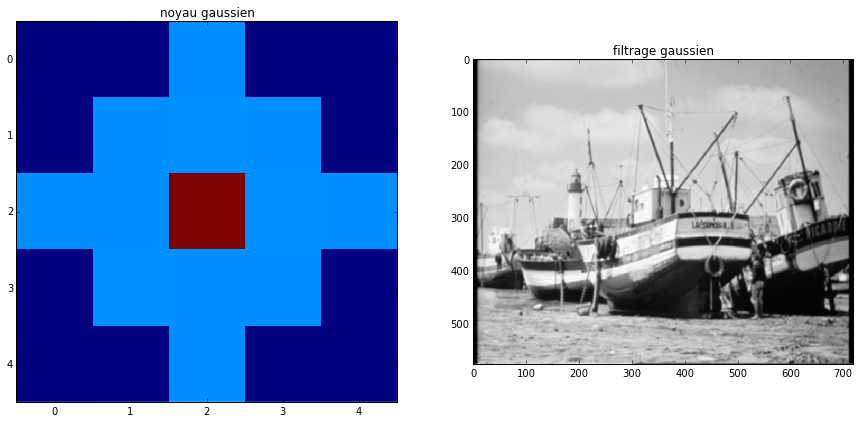

In [210]:
def gaussienne(x,y,var):
    return np.exp(-(x*x+y*y)/(2*var))/(2*np.pi*var)

kern_Gauss = np.zeros((5,5),np.float32)
for i in range(-2,3):
    for j in range(-2,3):
        kern_Gauss[i+2,j+2]= gaussienne(i,j,2)

gauss_boat = sitk.GetArrayFromImage(
    sitk.Convolution(sitk.Cast(img,sitk.sitkFloat32),sitk.GetImageFromArray(kern_Gauss)))
        
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.title('noyau gaussien')
plt.imshow(kern_Gauss,interpolation='none');
plt.subplot(1,2,2)
plt.title('filtrage gaussien')
plt.imshow(gauss_boat,cmap=plt.cm.Greys_r,interpolation='none')
plt.show()

Il existe un filtre dans la bibliothèque *SimpleITK* qui réalise l'opération directement : `sitk.DisreteGaussian`

In [211]:
help(sitk.DiscreteGaussian)

Help on function DiscreteGaussian in module SimpleITK.SimpleITK:

DiscreteGaussian(image1, variance=1.0, maximumKernelWidth=32, maximumError=0.01, useImageSpacing=True)
    DiscreteGaussian(Image image1, double variance=1.0, unsigned int maximumKernelWidth=32, double maximumError=0.01, bool useImageSpacing=True) -> Image
    
    Blurs an image by separable convolution with discrete gaussian
    kernels. This filter performs Gaussian blurring by separable
    convolution of an image and a discrete Gaussian operator (kernel).
    
    
    This function directly calls the execute method of DiscreteGaussianImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::DiscreteGaussianImageFilter for the object oriented interface



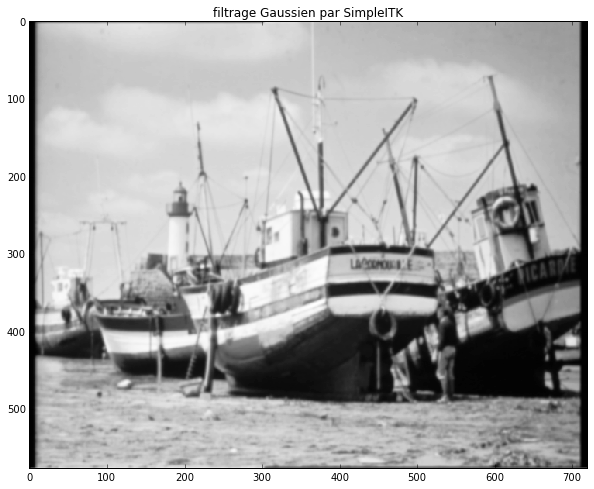

In [212]:
gauss_im = sitk.DiscreteGaussian(img,variance=2)
plt.figure(figsize=(10,10))
plt.title('filtrage Gaussien par SimpleITK')
plt.imshow(sitk.GetArrayFromImage(gauss_im), cmap=plt.cm.Greys_r,interpolation='none')
plt.show()

### Détection de contours
Une application importante des filtres est de récupérer les structures dans les images telles que les bords ou les contours d'un objet. Dans une image, les bords d'un objet peuvent être grossièrement décrit comme les positions de l'image où la variation d'intensité des pixels dans une direction est importante. Plus l'intensité du ce changement est important, plus le bord de l'objet dans l'image est marqué.

### Gradients
Mathématiquement, on caractérise ces variations d'intensité par le calcul de la dérivée première ou gradient. En première approximation, les fonctions gradients dans les directions horizontales et verticales d'une image peuvent être obtenue aisément par filtrage linéaire dont les coefficients matricielles du noyau sont de la forme :
$$ K_{\mathcal{x}}^{\mathcal{D}} = \frac{1}{2}(-1,0,1) \hspace{3cm}  \text{et} \hspace{3cm} K_{\mathcal{y}}^{\mathcal{D}} = \frac{1}{2} \left(\begin{matrix}-1\\0\\1\end{matrix}\right)$$

Les filtres de *Prewitt* et *Sobel*, parmi les plus connus, ont des noyaux de convolution dans les directions x et y de la forme:
$$ K^{\mathcal{P}}_{x} = \left(\begin{matrix}-1 & 0 & 1\\-1 & 0 & 1\\-1 & 0 & 1 \end{matrix}\right)
\hspace{2cm} 
K^{\mathcal{P}}_{y} = \left(\begin{matrix}-1 & -1 & -1\\0 & 0 & 0\\1 & 1 & 1 \end{matrix}\right)
$$

$$ K^{\mathcal{S}}_{x} = \left(\begin{matrix}-1 & 0 & 1\\-2 & 0 & 2\\-1 & 0 & 1 \end{matrix}\right)
\hspace{2cm} 
K^{\mathcal{S}}_{y} = \left(\begin{matrix}-1 & -2 & -1\\0 & 0 & 0\\1 & 2 & 1 \end{matrix}\right)
$$

#### Exercice 6 :
1. Créer une nouvelle cellule de calcul.
2. En vous basant sur le travail réalisé à l'exercice 5, calculer les images de gradient de *Sobel* dans les directions x et y de l'image des bateaux, $Sobel_x$ et $Sobel_y$
3. Caluler le module du gradient de l'image $\sqrt{\text{Sobel}_x^2 + \text{Sobel}_y^2}$
4. Comparer le résultat à celui de la fonction `sitk.SobelEdgeDetection`

**Correction**:

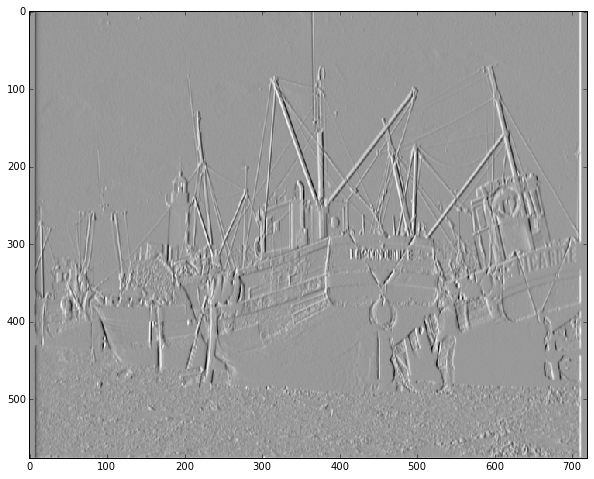

In [213]:
kern_sobel_x = np.zeros((3,3),dtype=np.float32)
kern_sobel_x[0,0] = kern_sobel_x[2,0] = -1
kern_sobel_x[1,0] = -2
kern_sobel_x[0,2] = kern_sobel_x[2,2] = 1
kern_sobel_x[1,2] = 2

Sobel_boat_x = sitk.Convolution(
    sitk.Cast(img,sitk.sitkFloat32),sitk.GetImageFromArray(kern_sobel_x))
plt.figure(figsize=(10,10))
plt.imshow(sitk.GetArrayFromImage(Sobel_boat_x),
           cmap=plt.cm.Greys_r,interpolation='none')
plt.show()

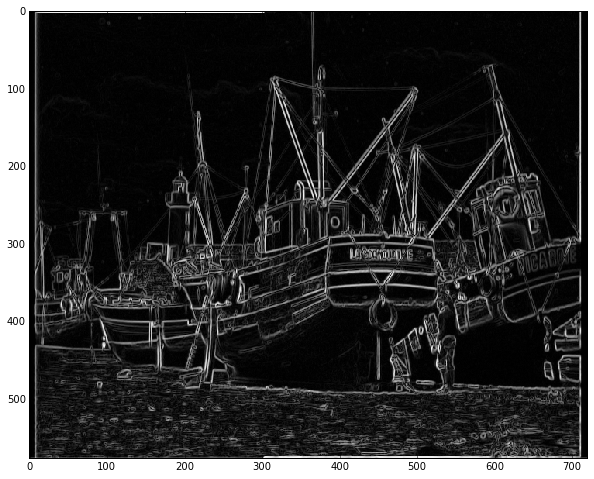

In [214]:
kern_sobel_y = np.zeros((3,3),dtype=np.float32)
kern_sobel_y[0,0] = kern_sobel_y[0,2] = -1
kern_sobel_y[0,1] = -2
kern_sobel_y[2,0] = kern_sobel_y[2,2] = 1
kern_sobel_y[2,1] = 2
Sobel_boat_y = sitk.Convolution(
    sitk.Cast(img,sitk.sitkFloat32),
    sitk.GetImageFromArray(kern_sobel_y))
Sobel_force = sitk.Sqrt(sitk.Square(Sobel_boat_y) + sitk.Square(Sobel_boat_x))
#Orientation = sitk.Atan2(Sobel_boat_x,Sobel_boat_y)
plt.figure(figsize=(10,10))
plt.imshow(sitk.GetArrayFromImage(Sobel_force),cmap=plt.cm.Greys_r,interpolation='none')
plt.show()


In [215]:
help(sitk.SobelEdgeDetection)

Help on function SobelEdgeDetection in module SimpleITK.SimpleITK:

SobelEdgeDetection(image1)
    SobelEdgeDetection(Image image1) -> Image
    
    A 2D or 3D edge detection using the Sobel operator.
    
    
    This function directly calls the execute method of SobelEdgeDetectionImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::SobelEdgeDetectionImageFilter for the object oriented interface



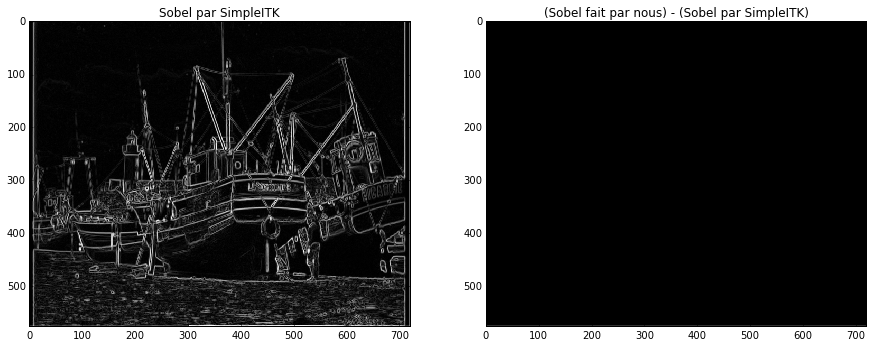

In [216]:
sobel_sitk = sitk.SobelEdgeDetection(sitk.Cast(img,sitk.sitkFloat32))

plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Sobel par SimpleITK')
plt.imshow(sitk.GetArrayFromImage(sobel_sitk),
           cmap=plt.cm.Greys_r,interpolation='none')
plt.subplot(1,2,2)
plt.title('(Sobel fait par nous) - (Sobel par SimpleITK)')
plt.imshow(sitk.GetArrayFromImage(sobel_sitk-Sobel_force),
           cmap=plt.cm.Greys_r,interpolation='none')
plt.show()

#sitk.Show(sobel_sitk-Sobel_force,'diff')
#canny = sitk.CannyEdgeDetection(sitk.Cast(img,sitk.sitkFloat32),variance=(1,1), lowerThreshold=5,upperThreshold=20)
#sitk.Show(sobel,'sobel')
#sitk.Show(canny,'canny')

____
## Filtres non linéaires

Dans leur utilisation de lissage ou de suppression du bruit, les filtres linéaires ont l'inconvénient majeur d'agir simultanément sur toutes les structures fines l'image (points, lignes, bords, ...) en réduisant ainsi sa qualité. Certains filtres dit *non linéaires* tels que minimum, maximum, median, etc ... peuvent offrir une meilleure option notamment pour la réduction du bruit.

### Filtre médian

A titre illustratif, nous allons nous interesser au filtre médian dont la caractéristique est de remplacer chaque valeur des pixels d'une image par la valeur médiane des pixels contenus dans une région centrée autour du pixel d'intérêt.

### Exercice 7
Créons une image bruitée de type *sel et poivre*.

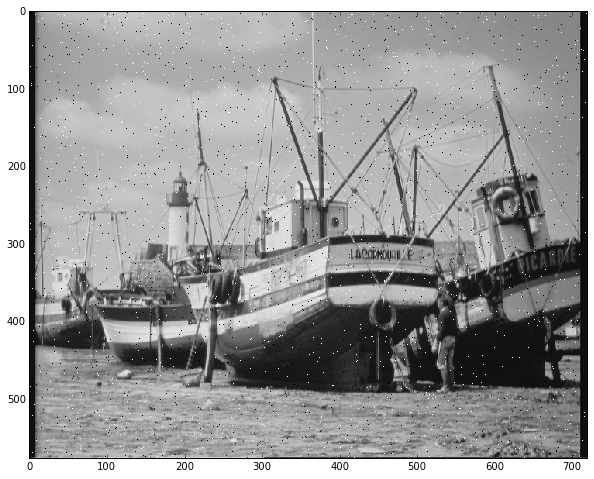

In [14]:
imgPoivreSel = sitk.SaltAndPepperNoise(img)
plt.figure(figsize=(10,10))
plt.imshow(sitk.GetArrayFromImage(imgPoivreSel),
           cmap=plt.cm.Greys_r,interpolation='none')
plt.show()
#sitk.Show(imgPoivreSel)
#sitk.Show(sitk.Convolution(imgPoivreSel,kern, normalize=True))

Compléter le code suivant dans la partie indiquée pour créer un *filtre médian*. 

```python
largeur = imgPoivreSel.GetWidth()
hauteur = imgPoivreSel.GetHeight()
ar_img = sitk.GetArrayFromImage(imgPoivreSel)

mask = np.zeros(9)

for l in range(1,largeur-1):
    for h in range(1,hauteur-1):
        #########
        # Votre code ICI
        #########
img_median = sitk.GetImageFromArray(ar_img)
plt.imshow(ar_img, cmap=plt.cm.Greys_r,interpolation='none')
```

____
**Correction** : 

CPU times: user 15.4 s, sys: 56.7 ms, total: 15.4 s
Wall time: 15.5 s


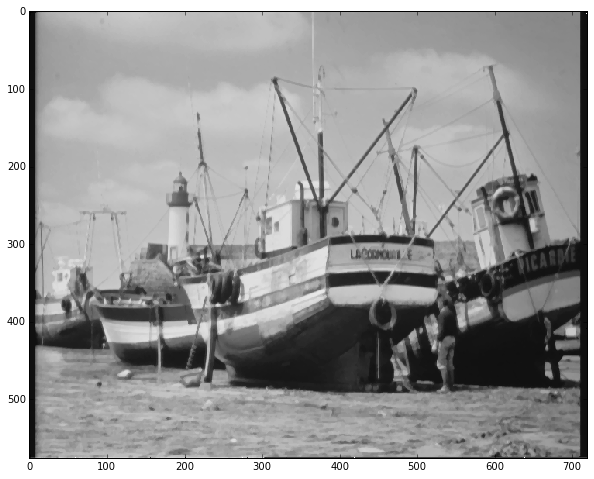

In [15]:
%%time

largeur = imgPoivreSel.GetWidth()
hauteur = imgPoivreSel.GetHeight()
ar_img = sitk.GetArrayFromImage(imgPoivreSel)

mask = np.zeros(9)

for l in range(1,largeur-1):
    for h in range(1,hauteur-1):
        k = 0
        for i in range(-1,2):
            for j in range(-1,2):
                mask[k] = ar_img[h+i,l+j]
                k = k+1
        ar_img[h,l] = np.median(mask)
plt.figure(figsize=(10,10))        
plt.imshow(ar_img, cmap=plt.cm.Greys_r,interpolation='none')

Il existe une version *SimpleITK* du filtre médian dont l'exécution est bien plus rapide que notre implémentation comme le montre l'execution du code suivant :

CPU times: user 233 ms, sys: 11.6 ms, total: 245 ms
Wall time: 199 ms


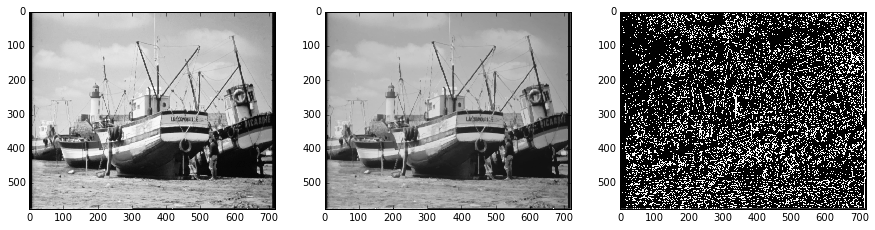

In [34]:
%%time
imgDenoise = sitk.Median(imgPoivreSel)
plt.subplots(figsize=(15,15))        
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(imgDenoise),
           cmap=plt.cm.Greys_r,interpolation='none')
plt.subplot(1,3,2)
plt.imshow(ar_img,
           cmap=plt.cm.Greys_r,interpolation='none')
plt.subplot(1,3,3)
plt.imshow(sitk.GetArrayFromImage(imgDenoise) - ar_img,
           cmap=plt.cm.Greys_r,interpolation='none')

On oberve grâce à la commande magique 
> %% time

que le temps d'exécution de la commande *SimpleITK* est de loin bien plus rapide.

________
## Domaine de Fourier
Image Haute et Basse Fréquence.

In [25]:
fft_img = sitk.FFTShift(sitk.ForwardFFT(sitk.Cast(img,sitk.sitkFloat32)))
sitk.Show(sitk.ComplexToModulus(fft_img))

In [26]:
# Une image masque representant un carré
bin_img = np.zeros(fft_img.GetSize(),dtype=np.float32)
bin_img[(720//2)-50:(720//2)+50,(576//2)-50:(576//2)+50] = 1.0
delta_bin = sitk.GetImageFromArray(bin_img.T)

# Une image masque representant un cercle
gauss = sitk.GaussianSource(sitk.sitkFloat32,
                            (720,576), (10.0,10.0),
                            (1,1), 255, (-360,-288),
                            (1,1), (1,0,0,1))
gauss_bin = sitk.Threshold(
    sitk.Threshold(gauss,0.01,255,0),0,0.01,1)
gauss_bin.SetOrigin((0,0))
#sitk.Show(sitk.InvertIntensity(gauss_bin))
reverse_FFT = sitk.InverseFFT(
    fft_img*(sitk.Cast(sitk.InvertIntensity(gauss_bin)-254,
                       sitk.sitkComplexFloat32)))
sitk.Show(sitk.Abs(reverse_FFT))